# BBBP: Test with stratified sets on the SMILES length

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, precision_recall_curve, auc

import seaborn as sns
sns.set_style('dark')

/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


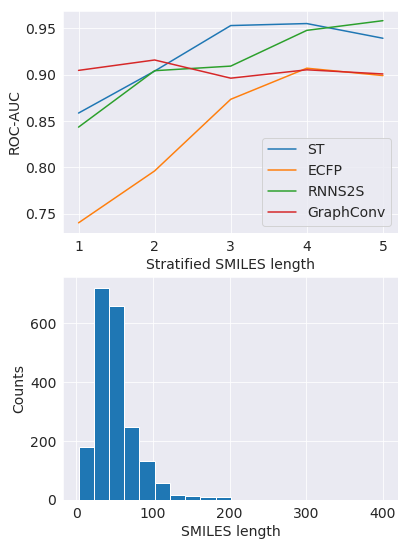

In [7]:
fig = plt.figure(figsize=(6,9))
plt.rcParams['font.size'] = 14

x = [1, 2, 3, 4, 5]
y00 = [0.85862067, 0.90392176, 0.95300735, 0.95516617, 0.93931837]
y01 = [0.04724516, 0.04547115, 0.02137438, 0.01550607, 0.0312619 ]
y10 = [0.74022413, 0.7962287,  0.87348057, 0.90701257, 0.89906024]
y11 = [0.04772464, 0.08154395, 0.05527435, 0.03429202, 0.02307766]
y20 = [0.8434636,  0.90431754, 0.9092739,  0.94782841, 0.95828293]
y21 = [0.04018736, 0.044927,   0.03594954, 0.0189617,  0.02197666]
y30 = [0.90465768, 0.9158698,  0.8962559,  0.90527957, 0.90081494]
y31 = [0.039465,   0.0429603,  0.04615946, 0.04302689, 0.03747349]

ax = fig.add_subplot(2, 1, 1)
ax.plot(x, y00 ,label='ST')
ax.plot(x, y10 ,label='ECFP')
ax.plot(x, y20 ,label='RNNS2S')
ax.plot(x, y30 ,label='GraphConv')
ax.set_xticks(x)
ax.set_xlabel('Stratified SMILES length')
ax.set_ylabel('ROC-AUC')
ax.legend()
ax.grid()

ax = fig.add_subplot(2, 1, 2)
df = pd.read_csv('data/bbbp.csv')
ax.hist(list(map(len, df['smiles'].values)), bins=20)
ax.set_xlabel('SMILES length')
ax.set_ylabel('Counts')
ax.grid()

plt.savefig('strat.png', dpi=300)
fig.show()

/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


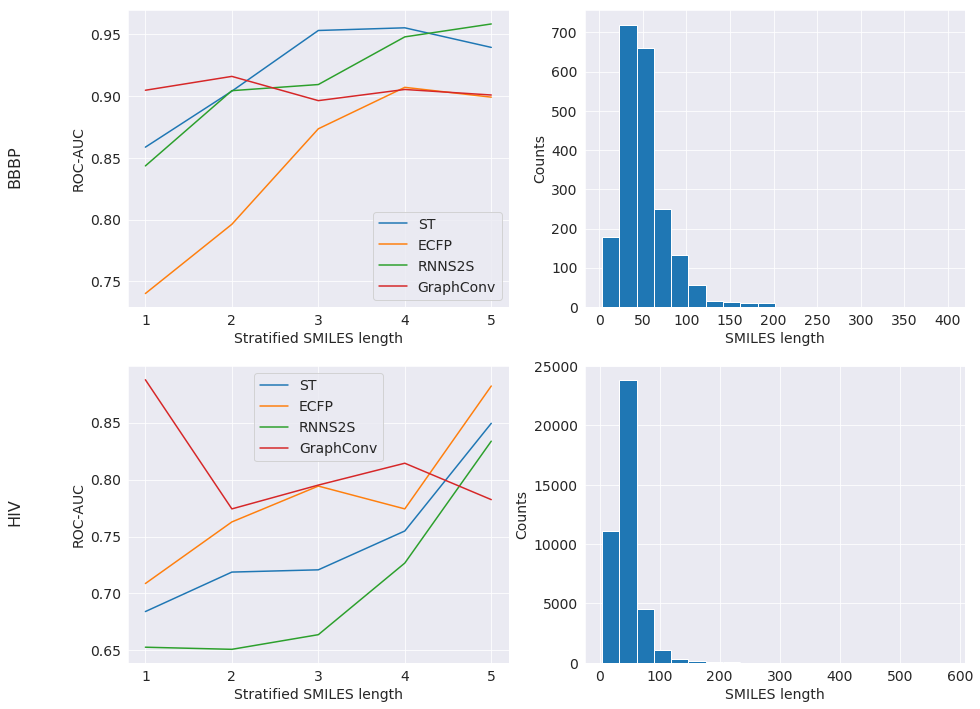

In [92]:
fig = plt.figure(figsize=(15,12))
plt.rcParams['font.size'] = 14
#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, )

x = [1, 2, 3, 4, 5]
y00 = [0.85862067, 0.90392176, 0.95300735, 0.95516617, 0.93931837]
y01 = [0.04724516, 0.04547115, 0.02137438, 0.01550607, 0.0312619 ]
y10 = [0.74022413, 0.7962287,  0.87348057, 0.90701257, 0.89906024]
y11 = [0.04772464, 0.08154395, 0.05527435, 0.03429202, 0.02307766]
y20 = [0.8434636,  0.90431754, 0.9092739,  0.94782841, 0.95828293]
y21 = [0.04018736, 0.044927,   0.03594954, 0.0189617,  0.02197666]
y30 = [0.90465768, 0.9158698,  0.8962559,  0.90527957, 0.90081494]
y31 = [0.039465,   0.0429603,  0.04615946, 0.04302689, 0.03747349]

ax = fig.add_subplot(2, 2, 1)
# ax.errorbar(x, y00, y01, label='ST', fmt='o-')
# ax.errorbar(x, y10, y11, label='ECFP', fmt='.--')
# ax.errorbar(x, y20, y21, label='RNNS2S', fmt='v-.')
# ax.errorbar(x, y30, y31, label='GraphConv', fmt='^:')
ax.plot(x, y00 ,label='ST')
ax.plot(x, y10 ,label='ECFP')
ax.plot(x, y20 ,label='RNNS2S')
ax.plot(x, y30 ,label='GraphConv')
ax.set_xticks(x)
ax.set_xlabel('Stratified SMILES length')
ax.set_ylabel('ROC-AUC')
ax.legend()
ax.grid()

ax = fig.add_subplot(2, 2, 2)
df = pd.read_csv('data/bbbp.csv')
ax.hist(list(map(len, df['smiles'].values)), bins=20)
ax.set_xlabel('SMILES length')
ax.set_ylabel('Counts')
ax.grid()


y00 = [0.68408001, 0.71874454, 0.72072563, 0.75484625, 0.84941198]
y01 = [0.0418942,  0.03758716, 0.03403227, 0.02725244, 0.02363938]
y10 = [0.7087033,  0.76279766, 0.79429214, 0.7742506,  0.88217889]
y11 = [0.04014194, 0.04618025, 0.02731838, 0.04298497, 0.02132686]
y20 = [0.65276065, 0.65089961, 0.66376145, 0.72666168, 0.8337165 ]
y21 = [0.05214281, 0.05239721, 0.03849954, 0.03402176, 0.02286239]
a = np.array(
[[1.        , 0.83950617, 0.8961039 , 1.        , 0.66666667],
 [0.81730769, 0.87719298, 0.71308017, 0.94285714, 1.        ],
 [0.96794872, 0.98441558, 0.525     , 0.4556962 , 0.99375   ],
 [0.9038961 , 0.675     , 0.96474359, 0.56875   , 0.81418919],
 [0.91983122, 0.975     , 0.9535865 , 1.        , 0.7257384 ],
 [0.95061728, 0.8375    , 0.54375   , 0.66666667, 0.49038462],
 [0.95061728, 0.72190476, 1.        , 0.98961039, 0.97530864],
 [0.57142857, 0.74683544, 0.91346154, 0.12345679, 0.85897436],
 [0.76623377, 1.        , 0.56140351, 0.9775641 , 0.72987013],
 [0.91025641, 0.01234568, 0.82051282, 0.98125   , 0.40625   ],
 [0.97468354, 0.66666667, 0.9875    , 0.95512821, 0.88888889],
 [0.90705128, 0.575     , 1.        , 0.96153846, 0.74038462],
 [1.        , 0.94375   , 0.58333333, 0.86605784, 0.71929825],
 [0.7875    , 0.98441558, 0.66987179, 0.9125    , 0.94375   ]])
y30 = np.mean(a, axis=0)
y31 = np.std(a, axis=0)

ax = fig.add_subplot(2, 2, 3)
# ax.errorbar(x, y00, y01, label='ST', fmt='o-')
# ax.errorbar(x, y10, y11, label='ECFP', fmt='.--')
# ax.errorbar(x, y20, y21, label='RNNS2S', fmt='v-.')
# ax.errorbar(x, y30, y31, label='GraphConv', fmt='^:')
ax.plot(x, y00 ,label='ST')
ax.plot(x, y10 ,label='ECFP')
ax.plot(x, y20 ,label='RNNS2S')
ax.plot(x, y30 ,label='GraphConv')
ax.set_xticks(x)
ax.set_xlabel('Stratified SMILES length')
ax.set_ylabel('ROC-AUC')
ax.legend()
ax.grid()

ax = fig.add_subplot(2, 2, 4)
df = pd.read_csv('data/hiv.csv')
ax.hist(list(map(len, df['smiles'].values)), bins=20)
ax.set_xlabel('SMILES length')
ax.set_ylabel('Counts')
ax.grid()

fig.text(0.02, 0.7, 'BBBP', ha='center', va='center', rotation='vertical', fontsize=16)
fig.text(0.02, 0.3, 'HIV', ha='center', va='center', rotation='vertical', fontsize=16)
plt.savefig('strat.png', dpi=300)
fig.show()

In [53]:
def get_inputs(sm):
    seq_len = 220
    sm = sm.split()
    if len(sm)>218:
        print('SMILES is too long ({:d})'.format(len(sm)))
        sm = sm[:109]+sm[-109:]
    ids = [vocab.stoi.get(token, unk_index) for token in sm]
    ids = [sos_index] + ids + [eos_index]
    seg = [1]*len(ids)
    padding = [pad_index]*(seq_len - len(ids))
    ids.extend(padding), seg.extend(padding)
    return ids, seg

def get_array(smiles):
    x_id, x_seg = [], []
    for sm in smiles:
        a,b = get_inputs(sm)
        x_id.append(a)
        x_seg.append(b)
    return torch.tensor(x_id), torch.tensor(x_seg)

In [54]:
from rdkit import Chem
from rdkit.Chem import AllChem

def bit2np(bitvector):
    bitstring = bitvector.ToBitString()
    intmap = map(int, bitstring)
    return np.array(list(intmap))

def extract_morgan(smiles, targets):
    x,X,y = [],[],[]
    for sm,target in zip(smiles,targets):
        mol = Chem.MolFromSmiles(sm)
        if mol is None:
            print(sm)
            continue
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) # Morgan (Similar to ECFP4)
        x.append(sm)
        X.append(bit2np(fp))
        y.append(target)
    return x,np.array(X),np.array(y)

In [73]:
import torch
from pretrain_trfm import TrfmSeq2seq
from pretrain_rnn import RNNSeq2Seq
from build_vocab import WordVocab
from utils import split

pad_index = 0
unk_index = 1
eos_index = 2
sos_index = 3
mask_index = 4

vocab = WordVocab.load_vocab('data/vocab.pkl')

trfm = TrfmSeq2seq(len(vocab), 256, len(vocab), 3)
trfm.load_state_dict(torch.load('.save/trfm_12_23000.pkl', map_location=torch.device('cpu')))
trfm.eval()
print('Total parameters:', sum(p.numel() for p in trfm.parameters()))

rnn = RNNSeq2Seq(len(vocab), 256, len(vocab), 3)
rnn.load_state_dict(torch.load('.save/seq2seq_1.pkl', map_location=torch.device('cpu')))
rnn.eval()
print('Total parameters:', sum(p.numel() for p in rnn.parameters()))

Total parameters: 4245037
Total parameters: 4713517


In [7]:
def evaluate_mlp_classification(X, y, n_repeats):
    rate = 0.8
    auc = np.empty(n_repeats)
    for i in range(n_repeats):
        clf = MLPClassifier(max_iter=1000)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-rate, stratify=y)
        clf.fit(X_train, y_train)
        y_score = clf.predict_proba(X_test)
        auc[i] = roc_auc_score(y_test, y_score[:,1])
    ret = {}
    ret['auc mean'] = np.mean(auc)
    ret['auc std'] = np.mean(np.std(auc, axis=0))
    return ret

In [62]:
df = pd.read_csv('data/bbbp.csv')
print(df.shape)
df.head()

(2050, 4)


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


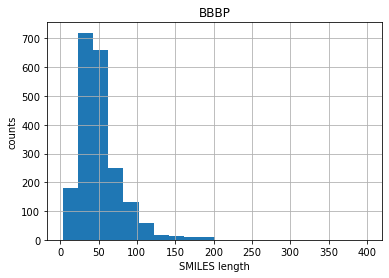

In [3]:
plt.hist(list(map(len, df['smiles'].values)), bins=20)
plt.xlabel('SMILES length')
plt.ylabel('counts')
plt.title('BBBP')
plt.grid()
plt.show()

### ST

In [8]:
x_split = [split(sm) for sm in df['smiles'].values]
xid, _ = get_array(x_split)
X = trfm.encode(torch.t(xid))
print(X.shape)

SMILES is too long (256)
SMILES is too long (239)
SMILES is too long (258)
SMILES is too long (380)
SMILES is too long (332)
There are 2050 molecules. It will take a little time.
(2050, 1024)


In [44]:
l = np.array([len(smiles) for smiles in df['smiles'].values]).reshape((-1,1))
y = df['p_np'].values.reshape((-1,1))
data = np.hstack([X, y, l])
data.shape

(2050, 1026)

In [77]:
scores = np.zeros((20,5))
for i in range(20):
    data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[:,-2])
    clf = MLPClassifier(max_iter=1000)
    clf.fit(data_train[:,:-2], data_train[:,-2])
    arg =  np.argsort(data_test[:,-1])
    data_list = np.array_split(data_test[arg], 5, axis=0)
    for j,d in enumerate(data_list):
        y_score = clf.predict_proba(d[:,:-2])
        scores[i, j] = roc_auc_score(d[:,-2], y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

[0.85862067 0.90392176 0.95300735 0.95516617 0.93931837]
[0.04724516 0.04547115 0.02137438 0.01550607 0.0312619 ]
[[0.83482714 0.89649924 0.91309524 0.97458791 0.88372093]
 [0.85339367 0.82939189 0.94825871 0.94181034 0.96536797]
 [0.92317542 0.93759513 0.96927017 0.97348485 0.9222488 ]
 [0.95273109 0.8952381  0.96517413 0.96969697 0.92486583]
 [0.92619048 0.86171575 0.95483193 0.94274194 0.91309524]
 [0.86486486 0.92541857 0.96716418 0.96296296 0.99342105]
 [0.88809524 0.92573624 0.97055058 0.96767241 0.85330948]
 [0.77369008 0.86403509 0.95721393 0.92954545 0.93872695]
 [0.84886878 0.92727273 0.9632107  0.94917582 0.95833333]
 [0.81714286 0.83994878 0.94166667 0.95382669 0.94504831]
 [0.8361204  0.95522388 0.96209588 0.97577277 0.93633634]
 [0.87068004 0.87519026 0.95483193 0.93265993 0.92218137]
 [0.82142857 0.90138889 0.92736486 0.93390805 0.96660704]
 [0.8625     0.98055556 0.95902689 0.93298634 0.96216216]
 [0.7900128  0.87323944 0.94285714 0.95578947 0.94736842]
 [0.78233035 0.9

### ECFP

In [78]:
x,X,y = extract_morgan(df['smiles'].values, df['p_np'].values)
print(len(X), len(y))

O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3
c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
Cc1nc(sc1)\[NH]=C(\N)N
s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N
c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br
n1c(csc1\[NH]=C(\N)N)c1ccccc1
n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N
n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O
n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N\C(NC)=[NH]\C#N
s1cc(nc1\[NH]=C(\N)N)C
c1(cc(N\C(=[NH]\c2cccc(c2)CC)C)ccc1)CC
2039 2039


In [81]:
l = np.array([len(smiles) for smiles in x]).reshape((-1,1))
y = y.reshape((-1,1))
data = np.hstack([X, y, l])
data.shape

(2039, 1026)

In [82]:
scores = np.zeros((20,5))
for i in range(20):
    data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[:,-2])
    clf = MLPClassifier(max_iter=1000)
    clf.fit(data_train[:,:-2], data_train[:,-2])
    arg =  np.argsort(data_test[:,-1])
    data_list = np.array_split(data_test[arg], 5, axis=0)
    for j,d in enumerate(data_list):
        y_score = clf.predict_proba(d[:,:-2])
        scores[i, j] = roc_auc_score(d[:,-2], y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

[0.74022413 0.7962287  0.87348057 0.90701257 0.89906024]
[0.04772464 0.08154395 0.05527435 0.03429202 0.02307766]
[[0.79004525 0.85307018 0.78361076 0.90755008 0.92378049]
 [0.74247492 0.71794872 0.88182832 0.90673077 0.87743902]
 [0.78082192 0.79166667 0.92701665 0.93478261 0.88231707]
 [0.80121528 0.71491228 0.92142857 0.8633157  0.93772894]
 [0.81791045 0.79166667 0.80833333 0.86825886 0.89378882]
 [0.7047619  0.7875     0.91722973 0.93478261 0.90697674]
 [0.72855314 0.94166667 0.93067227 0.92619048 0.86737805]
 [0.72064394 0.76944444 0.96347032 0.89355322 0.89718482]
 [0.66555184 0.94092827 0.81691542 0.94077961 0.9047619 ]
 [0.76988636 0.64148528 0.86659664 0.80942623 0.89627329]
 [0.71190781 0.67349552 0.91059028 0.91571429 0.89129032]
 [0.63764405 0.85083714 0.88055556 0.91633987 0.88950617]
 [0.81302521 0.75416667 0.88611111 0.86349206 0.89146341]
 [0.70294494 0.76883117 0.93233831 0.93118687 0.89190051]
 [0.79285714 0.82916667 0.91190476 0.92357143 0.87329193]
 [0.73021182 0.9

### RNN

In [63]:
x_split = [split(sm) for sm in df['smiles'].values]
xid, _ = get_array(x_split)
X = rnn.encode(torch.t(xid))
print(X.shape)

SMILES is too long (256)
SMILES is too long (239)
SMILES is too long (258)
SMILES is too long (380)
SMILES is too long (332)
There are 2050 molecules. It will take a little time.
(2050, 1024)


In [64]:
l = np.array([len(smiles) for smiles in df['smiles'].values]).reshape((-1,1))
y = df['p_np'].values.reshape((-1,1))
data = np.hstack([X, y, l])
data.shape

(2050, 1026)

In [65]:
scores = np.zeros((20,5))
for i in range(20):
    data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[:,-2])
    clf = MLPClassifier(max_iter=1000)
    clf.fit(data_train[:,:-2], data_train[:,-2])
    arg =  np.argsort(data_test[:,-1])
    data_list = np.array_split(data_test[arg], 5, axis=0)
    for j,d in enumerate(data_list):
        y_score = clf.predict_proba(d[:,:-2])
        scores[i, j] = roc_auc_score(d[:,-2], y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

[0.8434636  0.90431754 0.9092739  0.94782841 0.95828293]
[0.04018736 0.044927   0.03594954 0.0189617  0.02197666]
[[0.82380952 0.9254386  0.88068182 0.90086207 0.9385808 ]
 [0.92987013 0.89142857 0.86956522 0.94378307 0.95574163]
 [0.81081081 0.95281583 0.9264214  0.94325718 0.93480861]
 [0.82095238 0.93333333 0.87068004 0.98653846 0.90833333]
 [0.83946488 0.80694444 0.90138889 0.95129665 0.96289425]
 [0.84615385 0.87719298 0.91243781 0.94516129 0.98867024]
 [0.89186176 0.81887367 0.82878151 0.95725806 0.99762046]
 [0.78095238 0.91047619 0.93809524 0.9476787  0.96541443]
 [0.8297619  0.91385135 0.925      0.93493819 0.98145933]
 [0.81785714 0.94238156 0.94029851 0.94319131 0.97916667]
 [0.8644958  0.94517544 0.90412486 0.92794613 0.95855856]
 [0.75927602 0.83445946 0.94027778 0.95320513 0.959375  ]
 [0.85189076 0.91165173 0.96       0.92887931 0.97977394]
 [0.88860435 0.94063927 0.95170455 0.95286195 0.95036765]
 [0.86268657 0.88928571 0.92829706 0.94193548 0.9791294 ]
 [0.875      0.8

### GC

In [1]:
import os
import deepchem as dc
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel

In [22]:
featurizer = dc.feat.ConvMolFeaturizer()
loader = dc.data.CSVLoader(
      tasks=['p_np'],
      smiles_field='smiles',
      featurizer=featurizer)
dataset = loader.featurize('data/bbbp.csv')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from data/bbbp.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
TIMING: featurizing shard 0 took 8.481 s
TIMING: dataset construction took 10.422 s
Loading dataset from disk.


In [44]:
scores = np.zeros((20,5))
metrics = [dc.metrics.Metric(dc.metrics.roc_auc_score)]
for i in range(20):
    splitter = dc.splits.RandomStratifiedSplitter()
    train, val, _ = splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.2, frac_test=0)
    clf = GraphConvModel(n_tasks=1, batch_size=64, mode='classification')
    clf.fit(train)
    l = [len(smiles) for smiles in val.ids]
    arg = np.argsort(l)
    for j in range(5):
        val_j = val.select(arg).select(np.arange(j*82,(j+1)*82))
        scores[i,j] = clf.evaluate(val_j, metrics)['roc_auc_score']
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

TIMING: dataset construction took 1.491 s
Loading dataset from disk.
TIMING: dataset construction took 0.361 s
Loading dataset from disk.
TIMING: dataset construction took 0.358 s
Loading dataset from disk.


/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


TIMING: dataset construction took 0.530 s
Loading dataset from disk.
TIMING: dataset construction took 0.238 s
Loading dataset from disk.
computed_metrics: [0.8947368421052632]
TIMING: dataset construction took 0.511 s
Loading dataset from disk.
TIMING: dataset construction took 0.235 s
Loading dataset from disk.
computed_metrics: [0.9306451612903226]
TIMING: dataset construction took 0.536 s
Loading dataset from disk.
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
computed_metrics: [0.8742424242424243]
TIMING: dataset construction took 0.549 s
Loading dataset from disk.
TIMING: dataset construction took 0.254 s
Loading dataset from disk.
computed_metrics: [0.960967993754879]
TIMING: dataset construction took 0.750 s
Loading dataset from disk.
TIMING: dataset construction took 0.245 s
Loading dataset from disk.
computed_metrics: [0.9277389277389279]
TIMING: dataset construction took 1.485 s
Loading dataset from disk.
TIMING: dataset construction took 0.352 s
Loadi

TIMING: dataset construction took 0.245 s
Loading dataset from disk.
computed_metrics: [0.9299926308032425]
TIMING: dataset construction took 0.521 s
Loading dataset from disk.
TIMING: dataset construction took 0.225 s
Loading dataset from disk.
computed_metrics: [0.8170940170940171]
TIMING: dataset construction took 1.525 s
Loading dataset from disk.
TIMING: dataset construction took 0.389 s
Loading dataset from disk.
TIMING: dataset construction took 0.399 s
Loading dataset from disk.
TIMING: dataset construction took 0.545 s
Loading dataset from disk.
TIMING: dataset construction took 0.252 s
Loading dataset from disk.
computed_metrics: [0.8711943793911008]
TIMING: dataset construction took 0.585 s
Loading dataset from disk.
TIMING: dataset construction took 0.257 s
Loading dataset from disk.
computed_metrics: [0.821969696969697]
TIMING: dataset construction took 0.572 s
Loading dataset from disk.
TIMING: dataset construction took 0.241 s
Loading dataset from disk.
computed_metrics:

TIMING: dataset construction took 0.259 s
Loading dataset from disk.
computed_metrics: [0.9601648351648351]
TIMING: dataset construction took 0.553 s
Loading dataset from disk.
TIMING: dataset construction took 0.242 s
Loading dataset from disk.
computed_metrics: [0.9357638888888888]
TIMING: dataset construction took 0.559 s
Loading dataset from disk.
TIMING: dataset construction took 0.253 s
Loading dataset from disk.
computed_metrics: [0.9166666666666667]
TIMING: dataset construction took 0.540 s
Loading dataset from disk.
TIMING: dataset construction took 0.248 s
Loading dataset from disk.
computed_metrics: [0.9484848484848485]
TIMING: dataset construction took 0.832 s
Loading dataset from disk.
TIMING: dataset construction took 0.240 s
Loading dataset from disk.
computed_metrics: [0.8751393534002229]
TIMING: dataset construction took 1.533 s
Loading dataset from disk.
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.340 s
Load

## Plot

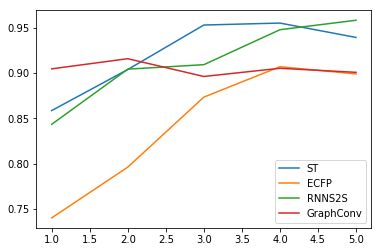

In [66]:
x = [1, 2, 3, 4, 5]
st = [0.85862067, 0.90392176, 0.95300735, 0.95516617, 0.93931837]
ecfp = [0.74022413, 0.7962287,  0.87348057, 0.90701257, 0.89906024]
rn = [0.8434636,  0.90431754, 0.9092739,  0.94782841, 0.95828293]
gc = [0.90465768, 0.9158698,  0.8962559,  0.90527957, 0.90081494]
plt.plot(x, st, label='ST')
plt.plot(x, ecfp, label='ECFP')
plt.plot(x, rn, label='RNNS2S')
plt.plot(x, gc, label='GraphConv')
plt.legend()
plt.show()

# HIV

In [67]:
df = pd.read_csv('data/hiv.csv')
print(df.shape)
df.head()

(41127, 3)


,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


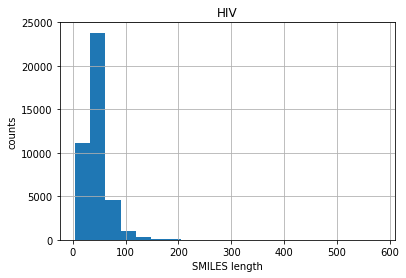

In [50]:
plt.hist(list(map(len, df['smiles'].values)), bins=20)
plt.xlabel('SMILES length')
plt.ylabel('counts')
plt.title('HIV')
plt.grid()
plt.show()

### ST

In [58]:
x_split = [split(sm) for sm in df['smiles'].values]
xid, _ = get_array(x_split)
X = trfm.encode(torch.t(xid))
print(X.shape)

SMILES is too long (220)
SMILES is too long (274)
SMILES is too long (247)
SMILES is too long (226)
SMILES is too long (244)
SMILES is too long (243)
SMILES is too long (253)
SMILES is too long (266)
SMILES is too long (346)
SMILES is too long (232)
SMILES is too long (242)
SMILES is too long (247)
SMILES is too long (240)
SMILES is too long (370)
SMILES is too long (224)
SMILES is too long (283)
SMILES is too long (265)
SMILES is too long (240)
SMILES is too long (219)
SMILES is too long (246)
SMILES is too long (243)
SMILES is too long (284)
SMILES is too long (270)
SMILES is too long (232)
SMILES is too long (260)
SMILES is too long (284)
SMILES is too long (284)
SMILES is too long (439)
SMILES is too long (491)
SMILES is too long (439)
SMILES is too long (296)
SMILES is too long (341)
SMILES is too long (285)
SMILES is too long (327)
SMILES is too long (341)
SMILES is too long (400)
SMILES is too long (263)
SMILES is too long (238)
SMILES is too long (383)
SMILES is too long (360)


In [60]:
l = np.array([len(smiles) for smiles in df['smiles'].values]).reshape((-1,1))
y = df['HIV_active'].values.reshape((-1,1))
data = np.hstack([X, y, l])
data.shape

(41127, 1026)

In [61]:
scores = np.zeros((20,5))
for i in range(20):
    data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[:,-2])
    clf = MLPClassifier(max_iter=1000)
    clf.fit(data_train[:,:-2], data_train[:,-2])
    arg =  np.argsort(data_test[:,-1])
    data_list = np.array_split(data_test[arg], 5, axis=0)
    for j,d in enumerate(data_list):
        y_score = clf.predict_proba(d[:,:-2])
        scores[i, j] = roc_auc_score(d[:,-2], y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

[0.68408001 0.71874454 0.72072563 0.75484625 0.84941198]
[0.0418942  0.03758716 0.03403227 0.02725244 0.02363938]
[[0.65911583 0.65470844 0.75336015 0.75953721 0.83253211]
 [0.66778572 0.73401389 0.6932861  0.78113576 0.90705393]
 [0.7432677  0.77027027 0.80317699 0.75220442 0.8399002 ]
 [0.6402944  0.78604105 0.68218182 0.72248611 0.83334452]
 [0.69621223 0.74677163 0.70526988 0.70906888 0.81640345]
 [0.68411681 0.69620696 0.72403427 0.75650162 0.86491239]
 [0.67641477 0.71251749 0.7032924  0.77700566 0.8359787 ]
 [0.66993761 0.75655374 0.74871473 0.76538039 0.83946391]
 [0.70805877 0.7380428  0.6978451  0.71525    0.82735263]
 [0.71676864 0.68105651 0.689125   0.74966691 0.84835796]
 [0.75587871 0.74469057 0.78052353 0.77199436 0.83365283]
 [0.69330573 0.6294501  0.73707165 0.78579189 0.82447868]
 [0.67520237 0.7203959  0.72279667 0.6917919  0.88738011]
 [0.65433057 0.71031343 0.68566379 0.77350174 0.86105337]
 [0.59118066 0.69183758 0.73889931 0.72423405 0.85148055]
 [0.68457096 0.7

### ECFP

In [69]:
x,X,y = extract_morgan(df['smiles'].values, df['HIV_active'].values)
print(len(X), len(y))

41127 41127


In [70]:
l = np.array([len(smiles) for smiles in x]).reshape((-1,1))
y = y.reshape((-1,1))
data = np.hstack([X, y, l])
data.shape

(41127, 1026)

In [71]:
scores = np.zeros((20,5))
for i in range(20):
    data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[:,-2])
    clf = MLPClassifier(max_iter=1000)
    clf.fit(data_train[:,:-2], data_train[:,-2])
    arg =  np.argsort(data_test[:,-1])
    data_list = np.array_split(data_test[arg], 5, axis=0)
    for j,d in enumerate(data_list):
        y_score = clf.predict_proba(d[:,:-2])
        scores[i, j] = roc_auc_score(d[:,-2], y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

[0.7087033  0.76279766 0.79429214 0.7742506  0.88217889]
[0.04014194 0.04618025 0.02731838 0.04298497 0.02132686]
[[0.68574889 0.74119444 0.75294342 0.77923702 0.87965669]
 [0.71251557 0.71473692 0.80106137 0.78396824 0.86908011]
 [0.7499509  0.75153505 0.82931123 0.80115059 0.90815412]
 [0.70197748 0.76211341 0.76246739 0.77647797 0.87513115]
 [0.70566796 0.71274388 0.79949384 0.80244514 0.90407172]
 [0.71076087 0.72685762 0.8037206  0.75886503 0.91740665]
 [0.73512273 0.72744835 0.78099562 0.75529639 0.86694463]
 [0.69983962 0.65378265 0.78634483 0.81503998 0.88522404]
 [0.75599551 0.80350491 0.75110656 0.73633333 0.84458743]
 [0.6490928  0.70788447 0.82233621 0.78059168 0.87397817]
 [0.74834369 0.78822545 0.80475271 0.80121428 0.87402657]
 [0.78167596 0.83986587 0.81146726 0.78625228 0.87510339]
 [0.78219629 0.7891305  0.83621738 0.75834996 0.85541347]
 [0.69744511 0.78182592 0.755125   0.76734881 0.8774519 ]
 [0.65732625 0.75556113 0.81983019 0.71860755 0.88080927]
 [0.68129745 0.8

### RNN

In [74]:
x_split = [split(sm) for sm in df['smiles'].values]
xid, _ = get_array(x_split)
X = rnn.encode(torch.t(xid))
print(X.shape)

SMILES is too long (220)
SMILES is too long (274)
SMILES is too long (247)
SMILES is too long (226)
SMILES is too long (244)
SMILES is too long (243)
SMILES is too long (253)
SMILES is too long (266)
SMILES is too long (346)
SMILES is too long (232)
SMILES is too long (242)
SMILES is too long (247)
SMILES is too long (240)
SMILES is too long (370)
SMILES is too long (224)
SMILES is too long (283)
SMILES is too long (265)
SMILES is too long (240)
SMILES is too long (219)
SMILES is too long (246)
SMILES is too long (243)
SMILES is too long (284)
SMILES is too long (270)
SMILES is too long (232)
SMILES is too long (260)
SMILES is too long (284)
SMILES is too long (284)
SMILES is too long (439)
SMILES is too long (491)
SMILES is too long (439)
SMILES is too long (296)
SMILES is too long (341)
SMILES is too long (285)
SMILES is too long (327)
SMILES is too long (341)
SMILES is too long (400)
SMILES is too long (263)
SMILES is too long (238)
SMILES is too long (383)
SMILES is too long (360)


In [75]:
l = np.array([len(smiles) for smiles in df['smiles'].values]).reshape((-1,1))
y = df['HIV_active'].values.reshape((-1,1))
data = np.hstack([X, y, l])
data.shape

(41127, 1026)

In [76]:
scores = np.zeros((20,5))
for i in range(20):
    data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[:,-2])
    clf = MLPClassifier(max_iter=1000)
    clf.fit(data_train[:,:-2], data_train[:,-2])
    arg =  np.argsort(data_test[:,-1])
    data_list = np.array_split(data_test[arg], 5, axis=0)
    for j,d in enumerate(data_list):
        y_score = clf.predict_proba(d[:,:-2])
        scores[i, j] = roc_auc_score(d[:,-2], y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

[0.65276065 0.65089961 0.66376145 0.72666168 0.8337165 ]
[0.05214281 0.05239721 0.03849954 0.03402176 0.02286239]
[[0.62129055 0.70089824 0.67328215 0.73721891 0.80072632]
 [0.63953115 0.64006284 0.5764437  0.71689817 0.86289038]
 [0.65029706 0.65885254 0.65219968 0.74505805 0.80827753]
 [0.66150572 0.79341615 0.6647862  0.73201265 0.86392336]
 [0.71531528 0.67482112 0.70436258 0.76276017 0.87538908]
 [0.61554096 0.68051464 0.63355399 0.72962691 0.81790525]
 [0.57074814 0.60250696 0.69031823 0.72876927 0.84251032]
 [0.69295915 0.61300572 0.64933246 0.70344295 0.82528462]
 [0.74739736 0.72447843 0.60610337 0.76150595 0.82557862]
 [0.67075083 0.6507192  0.6255948  0.7645389  0.85425061]
 [0.52683511 0.57850522 0.70451096 0.65691195 0.78735348]
 [0.7003701  0.71025181 0.74415113 0.70192062 0.80567398]
 [0.62790373 0.63168299 0.71729167 0.72073941 0.85284511]
 [0.63170987 0.62196922 0.65352621 0.73991667 0.84704694]
 [0.71133526 0.59965065 0.62274999 0.67455203 0.83472614]
 [0.68192151 0.6

### GC

In [77]:
featurizer = dc.feat.ConvMolFeaturizer()
loader = dc.data.CSVLoader(
      tasks=['HIV_active'],
      smiles_field='smiles',
      featurizer=featurizer)
dataset = loader.featurize('data/hiv.csv')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from data/hiv.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 31.829 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 33.355 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 2 took 34.571 s
Loading shard 4 of size 8192.
Featurizing sample 0
Featuri

In [78]:
from tqdm import tqdm_notebook as tqdm

scores = np.zeros((20,5))
for i in tqdm(range(20)):
    splitter = dc.splits.RandomStratifiedSplitter()
    train, val, _ = splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.2, frac_test=0)
    clf = GraphConvModel(n_tasks=1, batch_size=64, mode='classification')
    clf.fit(train)
    l = [len(smiles) for smiles in val.ids]
    arg = np.argsort(l)
    for j in range(5):
        val_j = val.select(arg).select(np.arange(j*82,(j+1)*82))
        y_score = clf.predict(val_j).reshape((-1,2))
        scores[i,j] = roc_auc_score(val_j.y.flatten(), y_score[:,1])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))
print(scores)

TIMING: dataset construction took 32.914 s
Loading dataset from disk.
TIMING: dataset construction took 8.559 s
Loading dataset from disk.
TIMING: dataset construction took 8.626 s
Loading dataset from disk.


/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


TIMING: dataset construction took 11.456 s
Loading dataset from disk.
TIMING: dataset construction took 4.060 s
Loading dataset from disk.
computed_metrics: [1.0]
TIMING: dataset construction took 11.642 s
Loading dataset from disk.
TIMING: dataset construction took 4.036 s
Loading dataset from disk.
computed_metrics: [0.8395061728395061]
TIMING: dataset construction took 12.489 s
Loading dataset from disk.
TIMING: dataset construction took 4.101 s
Loading dataset from disk.
computed_metrics: [0.8961038961038961]
TIMING: dataset construction took 12.296 s
Loading dataset from disk.
TIMING: dataset construction took 3.784 s
Loading dataset from disk.
computed_metrics: [1.0]
TIMING: dataset construction took 12.630 s
Loading dataset from disk.
TIMING: dataset construction took 3.865 s
Loading dataset from disk.
computed_metrics: [0.6666666666666667]
TIMING: dataset construction took 33.411 s
Loading dataset from disk.
TIMING: dataset construction took 8.074 s
Loading dataset from disk.
T

/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/deepchem/metrics/__init__.py:363: UserWarning: Error calculating metric roc_auc_score: Only one class present in y_true. ROC AUC score is not defined in that case.
  warnings.warn("Error calculating metric %s: %s" % (self.name, e))


TIMING: dataset construction took 34.506 s
Loading dataset from disk.
TIMING: dataset construction took 8.807 s
Loading dataset from disk.
TIMING: dataset construction took 8.502 s
Loading dataset from disk.
TIMING: dataset construction took 13.047 s
Loading dataset from disk.
TIMING: dataset construction took 4.186 s
Loading dataset from disk.
computed_metrics: [1.0]
TIMING: dataset construction took 12.520 s
Loading dataset from disk.
TIMING: dataset construction took 4.299 s
Loading dataset from disk.
computed_metrics: [0.7116883116883117]
TIMING: dataset construction took 12.981 s
Loading dataset from disk.
TIMING: dataset construction took 3.972 s
Loading dataset from disk.
computed_metrics: [nan]
TIMING: dataset construction took 12.061 s
Loading dataset from disk.
TIMING: dataset construction took 4.073 s
Loading dataset from disk.
computed_metrics: [0.9259259259259259]
TIMING: dataset construction took 12.953 s
Loading dataset from disk.
TIMING: dataset construction took 3.934 

TIMING: dataset construction took 11.602 s
Loading dataset from disk.
TIMING: dataset construction took 4.010 s
Loading dataset from disk.
computed_metrics: [0.9775641025641025]
TIMING: dataset construction took 11.906 s
Loading dataset from disk.
TIMING: dataset construction took 3.781 s
Loading dataset from disk.
computed_metrics: [0.7298701298701298]
TIMING: dataset construction took 35.203 s
Loading dataset from disk.
TIMING: dataset construction took 8.547 s
Loading dataset from disk.
TIMING: dataset construction took 8.323 s
Loading dataset from disk.
TIMING: dataset construction took 12.364 s
Loading dataset from disk.
TIMING: dataset construction took 4.148 s
Loading dataset from disk.
computed_metrics: [0.9113924050632911]
TIMING: dataset construction took 12.408 s
Loading dataset from disk.
TIMING: dataset construction took 4.340 s
Loading dataset from disk.
computed_metrics: [0.69375]
TIMING: dataset construction took 11.876 s
Loading dataset from disk.
TIMING: dataset const

In [89]:
a = np.array(
[[1.        , 0.83950617, 0.8961039 , 1.        , 0.66666667],
 [0.81730769, 0.87719298, 0.71308017, 0.94285714, 1.        ],
 [0.96794872, 0.98441558, 0.525     , 0.4556962 , 0.99375   ],
 [0.9038961 , 0.675     , 0.96474359, 0.56875   , 0.81418919],
 [0.91983122, 0.975     , 0.9535865 , 1.        , 0.7257384 ],
 [0.95061728, 0.8375    , 0.54375   , 0.66666667, 0.49038462],
 [0.95061728, 0.72190476, 1.        , 0.98961039, 0.97530864],
 [0.57142857, 0.74683544, 0.91346154, 0.12345679, 0.85897436],
 [0.76623377, 1.        , 0.56140351, 0.9775641 , 0.72987013],
 [0.91025641, 0.01234568, 0.82051282, 0.98125   , 0.40625   ],
 [0.97468354, 0.66666667, 0.9875    , 0.95512821, 0.88888889],
 [0.90705128, 0.575     , 1.        , 0.96153846, 0.74038462],
 [1.        , 0.94375   , 0.58333333, 0.86605784, 0.71929825],
 [0.7875    , 0.98441558, 0.66987179, 0.9125    , 0.94375   ]])
y30 = np.mean(a, axis=0)
y31 = np.std(a, axis=0)

In [83]:
from tqdm import tqdm_notebook as tqdm

scores = np.zeros((20,5))
for i in tqdm(range(20)):
    splitter = dc.splits.RandomStratifiedSplitter()
    train, val, _ = splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.2, frac_test=0)
    clf = GraphConvModel(n_tasks=1, batch_size=64, mode='classification')
    clf.fit(train)
    l = [len(smiles) for smiles in val.ids]
    arg = np.argsort(l)
    for j in range(5):
        val_j = val.select(arg).select(np.arange(j*82,(j+1)*82))
        y_score = clf.predict(val_j).reshape((-1,2))
        scores[i,j] = roc_auc_score(val_j.y.flatten(), y_score[:,1])
    print(scores[i])
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0))

TIMING: dataset construction took 34.133 s
Loading dataset from disk.
TIMING: dataset construction took 7.917 s
Loading dataset from disk.
TIMING: dataset construction took 7.695 s
Loading dataset from disk.


/home/honda/anaconda3/envs/deepchem/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


TIMING: dataset construction took 11.234 s
Loading dataset from disk.
TIMING: dataset construction took 3.917 s
Loading dataset from disk.
TIMING: dataset construction took 11.925 s
Loading dataset from disk.
TIMING: dataset construction took 3.341 s
Loading dataset from disk.
TIMING: dataset construction took 11.770 s
Loading dataset from disk.
TIMING: dataset construction took 3.806 s
Loading dataset from disk.
TIMING: dataset construction took 11.281 s
Loading dataset from disk.
TIMING: dataset construction took 3.929 s
Loading dataset from disk.
TIMING: dataset construction took 11.279 s
Loading dataset from disk.
TIMING: dataset construction took 3.332 s
Loading dataset from disk.
[0.77777778 0.76875    0.72635135 0.97530864 0.80168776]
TIMING: dataset construction took 34.960 s
Loading dataset from disk.
TIMING: dataset construction took 8.278 s
Loading dataset from disk.
TIMING: dataset construction took 8.094 s
Loading dataset from disk.
TIMING: dataset construction took 11.291

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.